In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

# helper function

# convert dataframe to dictionary following certain format
def to_dict(data):
    dict = {}
    for i in data.sort_values('cluster')['cluster'].unique():
        l = data[data['cluster'] == i].index.to_list()
        dict[f'cluster{i}'] = l
    return dict

In [2]:
# read data
df = pd.read_csv('../data/ccy1996_to_2023(c).csv')
df.set_index('Date', inplace=True)

ccy = df[313:]
ccy.head()

,USDAUD,USDNZD,USDEUR,USDGBP,USDCAD,USDCHF,USDJPY,AUDNZD,EURAUD,GBPAUD,...,EURGBP,EURCAD,EURCHF,EURJPY,GBPCAD,GBPCHF,GBPJPY,CADCHF,CADJPY,CHFJPY
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-04,1.921783,2.327205,1.117381,0.691611,1.5949,1.65190,130.920,1.21100,1.72020,2.7781,...,0.61900,1.42780,1.47860,117.185,2.30635,2.38800,189.28,1.03550,82.10,79.265
2002-01-11,1.922153,2.359604,1.120260,0.690107,1.5967,1.65610,132.080,1.22755,1.71540,2.7842,...,0.61615,1.42505,1.47785,117.910,2.31365,2.39660,191.38,1.03595,82.73,79.855
2002-01-18,1.943635,2.362112,1.130838,0.695725,1.6145,1.66240,132.550,1.21530,1.71805,2.7937,...,0.61525,1.42770,1.46960,117.190,2.32045,2.38885,190.53,1.02960,82.08,79.725
2002-01-25,1.936671,2.356823,1.154601,0.709421,1.6104,1.70330,134.370,1.21695,1.67700,2.7301,...,0.61435,1.39445,1.47510,116.365,2.26985,2.40080,189.41,1.05780,83.43,78.875
2002-02-01,1.963672,2.393203,1.159891,0.705393,1.5904,1.71425,133.075,1.21875,1.69340,2.7838,...,0.60830,1.37155,1.47825,114.790,2.25460,2.42990,188.77,1.07800,83.72,77.675


### Hierarchical Clustering by price correlation matrix

In [3]:
# generate correlation matrix
corr_price = ccy.corr()

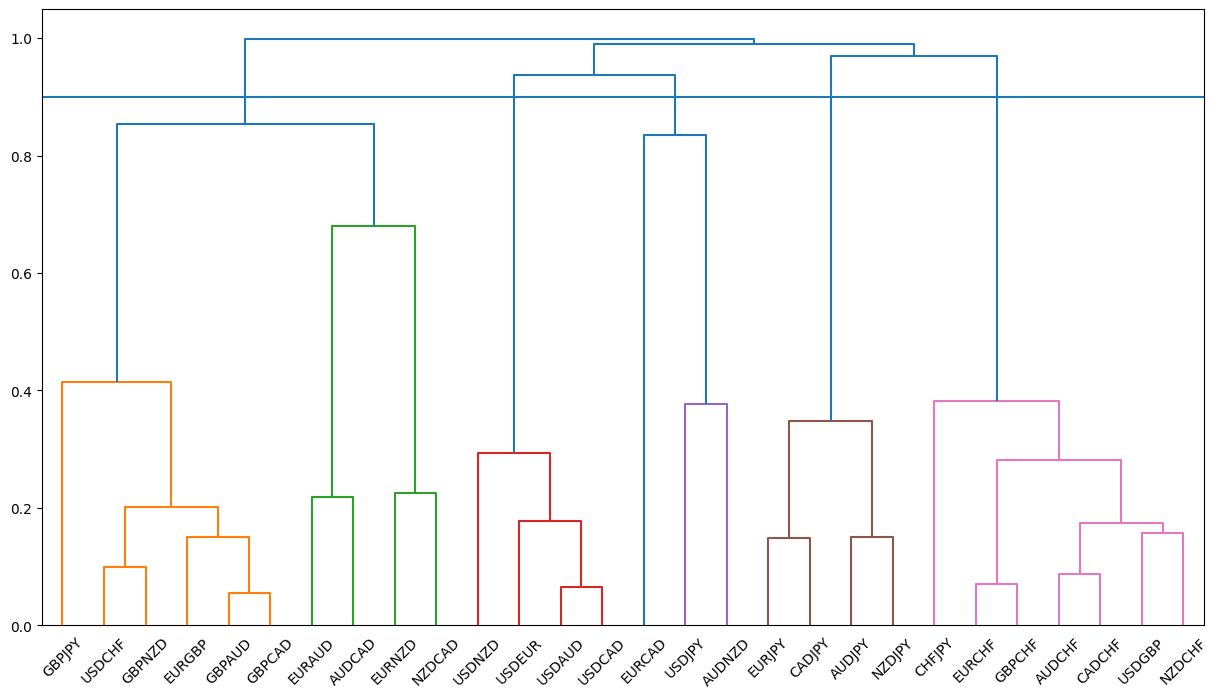

In [4]:
# hierarchical clustering and plot dendragram
plt.figure(figsize=(15,8))
price_distance = 1 - abs(corr_price)
Z_price = linkage(squareform(price_distance), 'complete')

dendrogram(Z_price, labels=ccy.columns, orientation='top', leaf_rotation=45)
plt.axhline(0.9)
plt.show()

In [5]:
# set up threshold
t_price = 0.9

# assign cluster
price_labels = fcluster(Z_price, t_price, criterion='distance')

# convert to DataFrame for better manipulation
price_cluster = pd.DataFrame(index = ccy.columns, data=price_labels)
price_cluster.rename(columns={0:'cluster'}, inplace=True)

# print out resulted cluster information
for i in range(1,len(np.unique(price_labels))+1):
    print(price_cluster[price_cluster['cluster']==i])

# export to csv for later
price_dict = to_dict(price_cluster)
price_cluster_df = pd.DataFrame.from_dict(price_dict, orient='index')
price_cluster_df.to_csv('../data/price_cluster.csv', index=False)

        cluster
USDCHF        1
EURAUD        1
GBPAUD        1
AUDCAD        1
EURNZD        1
GBPNZD        1
NZDCAD        1
EURGBP        1
GBPCAD        1
GBPJPY        1
        cluster
USDAUD        2
USDNZD        2
USDEUR        2
USDCAD        2
        cluster
USDJPY        3
AUDNZD        3
EURCAD        3
        cluster
AUDJPY        4
NZDJPY        4
EURJPY        4
CADJPY        4
        cluster
USDGBP        5
AUDCHF        5
NZDCHF        5
EURCHF        5
GBPCHF        5
CADCHF        5
CHFJPY        5


All in all, the clusters make slightly more sense than the clusters from KMean Algo. Most of the JPY being one cluster (4) and CHF in one (5).   
JPY and CHF are generally a risk off currency, so it makes sense to be grouped together.  
However, The other cluster does not seem to be that clear-cut

### Hierarchical Clustering by weekly return correlation matrix

In [6]:
# weekly return and generate correlation matrix
ccy_r = ccy.pct_change().dropna()
corr_return = ccy_r.corr()

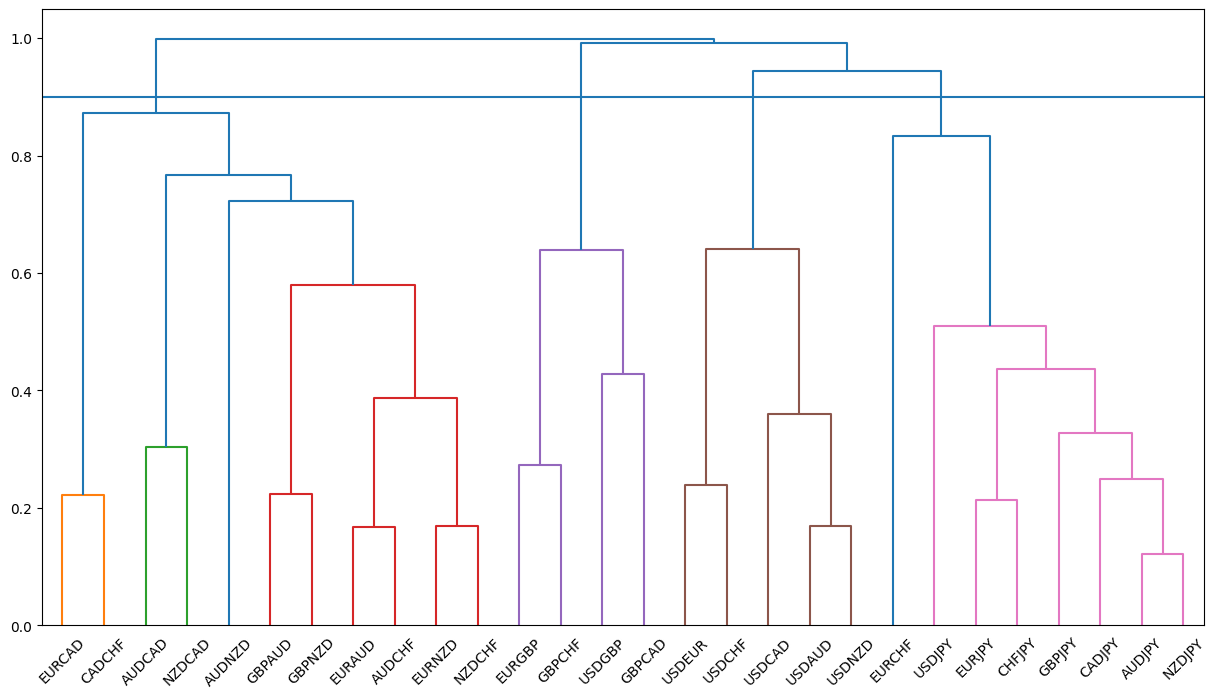

In [7]:
# hierarchical clustering and plot dendragram
plt.figure(figsize=(15,8))
return_distance = 1 - abs(corr_return)
Z_return = linkage(squareform(return_distance), 'complete')

dendrogram(Z_return, labels=ccy.columns, orientation='top', leaf_rotation=45)
plt.axhline(0.9)
plt.show()

In [8]:
# set up threshold
t_return = 0.9

# assign cluster
return_labels = fcluster(Z_return, t_return, criterion='distance')

# convert to DataFrame for better manipulation
return_cluster = pd.DataFrame(index = ccy.columns, data=return_labels)
return_cluster.rename(columns={0:'cluster'}, inplace=True)

# print out resulted cluster information
for i in range(1,len(np.unique(return_labels))+1):
    print(return_cluster[return_cluster['cluster']==i])

# export to csv for later
return_dict = to_dict(return_cluster)
return_cluster_df = pd.DataFrame.from_dict(return_dict, orient='index')
return_cluster_df.to_csv('../data/return_corr_cluster.csv', index=False)

        cluster
AUDNZD        1
EURAUD        1
GBPAUD        1
AUDCAD        1
AUDCHF        1
EURNZD        1
GBPNZD        1
NZDCAD        1
NZDCHF        1
EURCAD        1
CADCHF        1
        cluster
USDGBP        2
EURGBP        2
GBPCAD        2
GBPCHF        2
        cluster
USDAUD        3
USDNZD        3
USDEUR        3
USDCAD        3
USDCHF        3
        cluster
USDJPY        4
AUDJPY        4
NZDJPY        4
EURCHF        4
EURJPY        4
GBPJPY        4
CADJPY        4
CHFJPY        4


Above makes even more sense, where risk off currencies is togther (4), most of the USD is together (3), and the cluster 2 of GBP exposure, while cluster 1 is a mixture of the rest.   
This clustering looks to be the best without involving the time series nature of the data.   
However, they might not be distinctively different from one another. We would explore further with Dynamic Time Warping which consider the time series nature of the data